In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [12]:
file_path = "PDB_metadata.csv"
PDB_df = pd.read_csv(file_path, sep=',', header=0, low_memory=False)
PDB_df

,file_name,source_file,host_domain,seq_name,n_genes_with_taxonomy_genomad,agreement_genomad,taxid_genomad,lineage_genomad,accession,ncbi_country,...,proviral_length,gene_count,viral_genes,host_genes,checkv_quality,miuvig_quality,completeness,completeness_method,contamination,kmer_freq
0,SPIRE_spire_mag_02564574.phages_lytic,spire_mag_02564574,Bacteria,k141_1161678,4.0,1.0,2561.0,Viruses;Duplodnaviria;Heunggongvirae;Urovirico...,NaN,NaN,...,NaN,7,2,0,Low-quality,Genome-fragment,7.55,AAI-based (medium-confidence),0.0,1.00
1,GTDB_GCA_900549015.1_genomic.phages_lysogenic,GCA_900549015.1,Bacteria,URMH01000015.1_uncultured_Blautia_sp._isolate_...,39.0,1.0,2561.0,Viruses;Duplodnaviria;Heunggongvirae;Urovirico...,GB_GCA_900549015.1,none,...,NaN,52,29,0,High-quality,High-quality,97.81,AAI-based (high-confidence),0.0,1.00
2,GTDB_GCA_018268465.1_genomic.phages_lysogenic_...,GCA_018268465.1,Bacteria,JAFDWN010000007.1_Actinobacteria_bacterium_iso...,8.0,1.0,2561.0,Viruses;Duplodnaviria;Heunggongvirae;Urovirico...,GB_GCA_018268465.1,China: Shenzhen,...,NaN,18,4,0,Low-quality,Genome-fragment,19.66,HMM-based (lower-bound),0.0,1.00
3,NCBI_GCF_003403135.1_ASM340313v1_genomic.phage...,GCF_003403135.1,Bacteria,NZ_CP031560.1_Dickeya_dianthicola_strain_ME23_...,19.0,1.0,2561.0,Viruses;Duplodnaviria;Heunggongvirae;Urovirico...,RS_GCF_003403135.1,USA:Maine,...,NaN,28,18,3,Medium-quality,Genome-fragment,68.85,AAI-based (high-confidence),0.0,1.01
4,SPIRE_spire_mag_02720653.phages_lytic_sequence#5,spire_mag_02720653,Bacteria,k141_394870,5.0,1.0,2561.0,Viruses;Duplodnaviria;Heunggongvirae;Urovirico...,NaN,NaN,...,NaN,6,5,0,Low-quality,Genome-fragment,5.80,AAI-based (high-confidence),0.0,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356771,SPIRE_spire_mag_01787258.phages_lytic_sequence#38,spire_mag_01787258,Unclassified,k141_32889,NaN,NaN,NaN,No geNomad classification,NaN,NaN,...,NaN,6,2,0,Low-quality,Genome-fragment,21.67,AAI-based (high-confidence),0.0,1.00
356772,SPIRE_spire_mag_00381603.phages_lytic_sequence#12,spire_mag_00381603,Unclassified,k141_444403,NaN,NaN,NaN,No geNomad classification,NaN,NaN,...,NaN,7,0,0,Not-determined,Genome-fragment,NaN,NaN,0.0,1.00
356773,SPIRE_spire_mag_02306265.phages_lytic_sequence#14,spire_mag_02306265,Unclassified,k119_832124,NaN,NaN,NaN,No geNomad classification,NaN,NaN,...,NaN,4,0,0,Not-determined,Genome-fragment,NaN,NaN,0.0,1.00
356774,SPIRE_spire_mag_00036105.phages_lytic_sequence#4,spire_mag_00036105,Unclassified,k141_3131070,NaN,NaN,NaN,No geNomad classification,NaN,NaN,...,NaN,5,0,0,Not-determined,Genome-fragment,NaN,NaN,0.0,1.00


In [13]:
bacteria_df = PDB_df[PDB_df['host_domain'] == 'Bacteria'].copy()
archaea_df = PDB_df[PDB_df['host_domain'] == 'Archaea'].copy()
unclassified_df = PDB_df[PDB_df['host_domain'] == 'Unclassified'].copy()

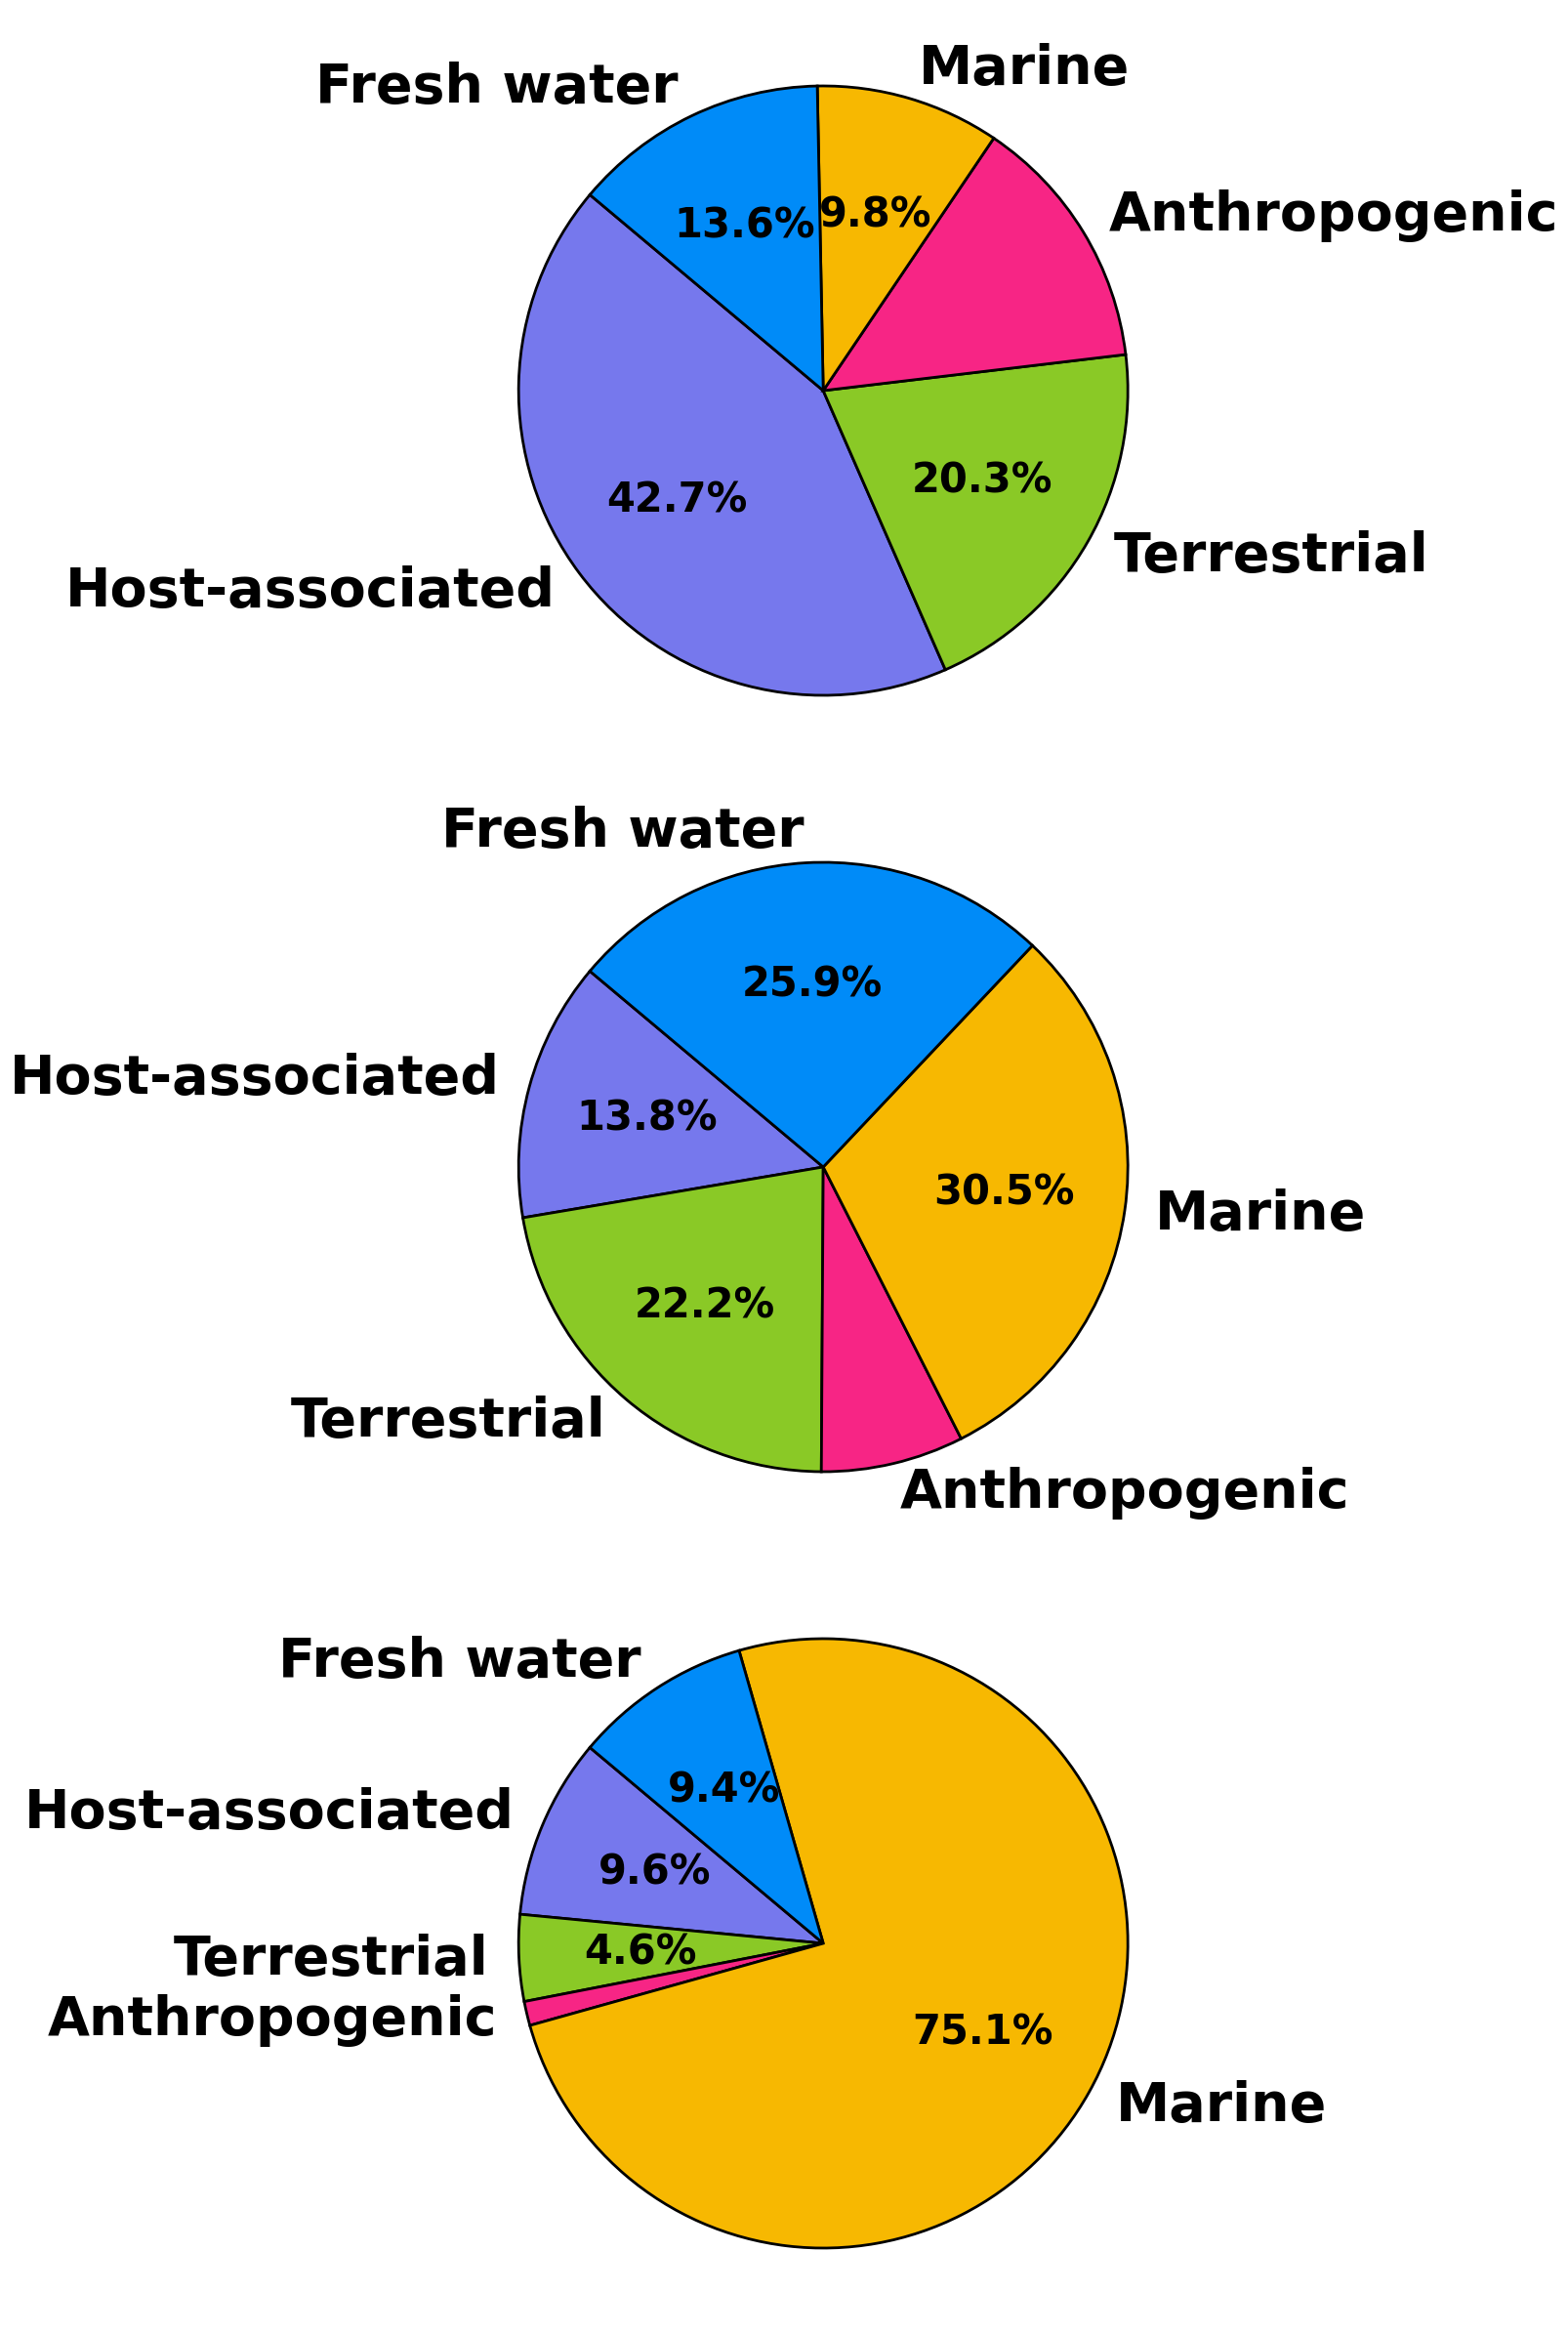

In [14]:
# Environmetal groups of interest
environment_groups = ['host-associated', 'terrestrial', 'anthropogenic', 'marine', 'fresh water']

colors = ['#7678ed', '#8ac926', '#f72585', '#f7b801', '#008bf8']

def plot_pie_chart(ax, df, title):
    # Initialize counts for each environment group
    environment_counts = {group: 0 for group in environment_groups}
    
    # Count occurrences of each environment group
    for group in environment_groups:
        environment_counts[group] = (df['environment'].str.contains(group, case=False)).sum()
    
    # Plotting the pie chart with specified font properties and thicker outlines
    wedges, texts, autotexts = ax.pie(environment_counts.values(), 
                                      labels=[group.capitalize() for group in environment_counts.keys()], 
                                      autopct=my_autopct, 
                                      startangle=140, 
                                      colors=colors, 
                                      textprops={'fontweight': 'bold'}, 
                                      wedgeprops={'linewidth': 2})
    
    # Set different font sizes for name labels and percentages
    for text in texts:
        text.set_fontsize(40)  # Set the font size for the labels
    
    for autotext, group in zip(autotexts, environment_groups):
        if group == 'anthropogenic':
            autotext.set_visible(False)  # Hide/show the percentage for 'anthropogenic' category
        else:
            autotext.set_fontsize(30)  # Set the font size for the percentages

    
    # Add thick outline to the plot
    for wedge in wedges:
        wedge.set_edgecolor('black')
        wedge.set_linewidth(2)
    
    # Add thick outline to the plot
    for spine in ax.spines.values():
        spine.set_linewidth(2)

# Define the autopct function
def my_autopct(pct):
    return '' if pct < 1 and pct != 0 else '%1.1f%%' % pct

# Create a figure with subplots in a column layout
fig, axs = plt.subplots(3, 1, figsize=(18, 24))

# Plot each pie chart
plot_pie_chart(axs[0], bacteria_df, 'Bacteria')
plot_pie_chart(axs[1], archaea_df, 'Archaea')
plot_pie_chart(axs[2], unclassified_df, 'Unclassified')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

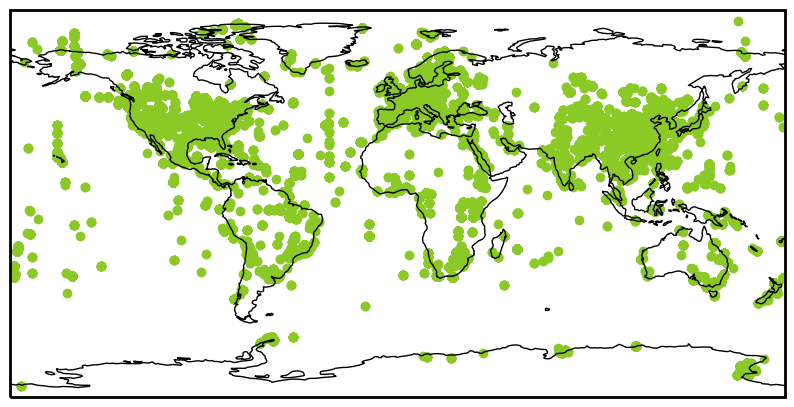

In [15]:
# Extract latitude and longitude columns from bacteria_df
latitudes_lytic = bacteria_df['latitude']
longitudes_lytic = bacteria_df['longitude']

# Plotting bacteria_df coordinates
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.coastlines()
ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())
# Plot the latitudes and longitudes
ax.scatter(longitudes_lytic, latitudes_lytic, transform=ccrs.PlateCarree(), marker='o', color='#8ac926')
for spine in ax.spines.values():
    spine.set_linewidth(2)  
plt.show()

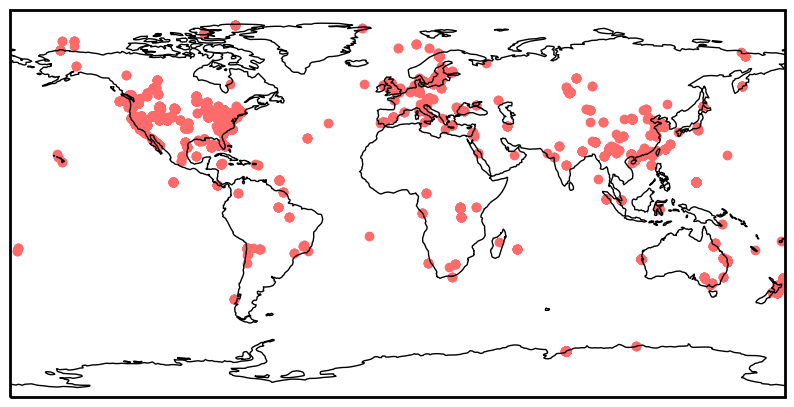

In [16]:
# Extract latitude and longitude columns from archaea_df
latitudes_lytic = archaea_df['latitude']
longitudes_lytic = archaea_df['longitude']

# Plotting archaea_df coordinates
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.coastlines()
ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())
# Plot the latitudes and longitudes
ax.scatter(longitudes_lytic, latitudes_lytic, transform=ccrs.PlateCarree(), marker='o', color='#ff6b6b')
for spine in ax.spines.values():
    spine.set_linewidth(2)  
plt.show()

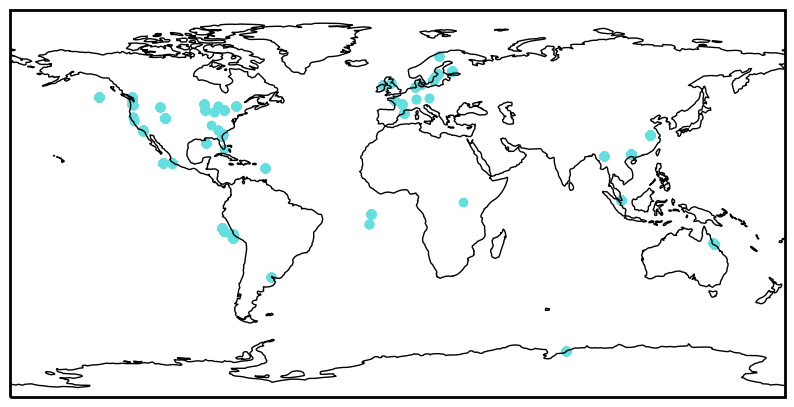

In [17]:
# Extract latitude and longitude columns from unclassified_df
latitudes_lytic = unclassified_df['latitude']
longitudes_lytic = unclassified_df['longitude']

# Plotting unclassified_df coordinates
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.coastlines()
ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())
# Plot the latitudes and longitudes
ax.scatter(longitudes_lytic, latitudes_lytic, transform=ccrs.PlateCarree(), marker='o', color='#64dfdf')
for spine in ax.spines.values():
    spine.set_linewidth(2) 
plt.show()